In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

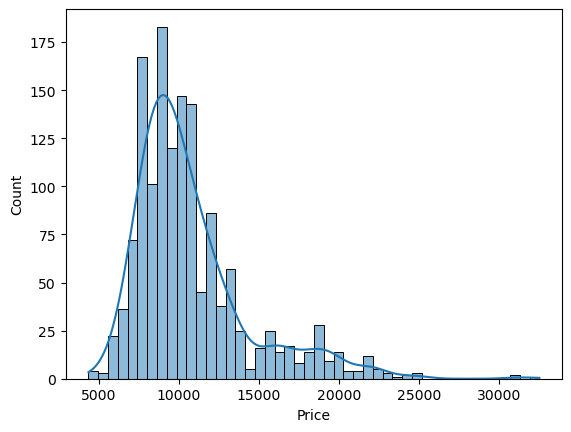

In [5]:
sns.histplot(df['Price'],kde=True)
plt.show()

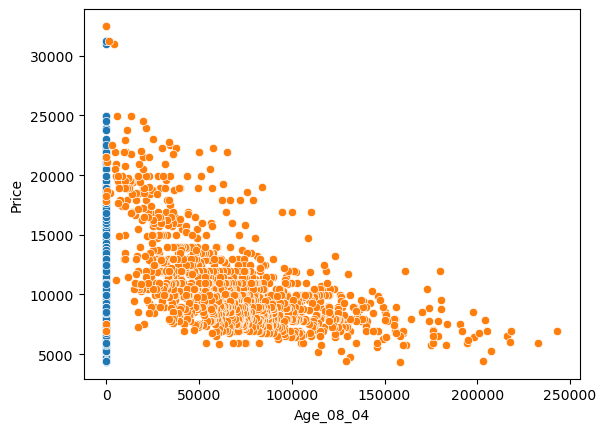

In [6]:
sns.scatterplot(x='Age_08_04',y='Price',data=df)
plt.show

sns.scatterplot(x='KM',y='Price',data=df)
plt.show()

In [7]:
### As Age increases → Price decreases
 ### As KM increases → Price decreases

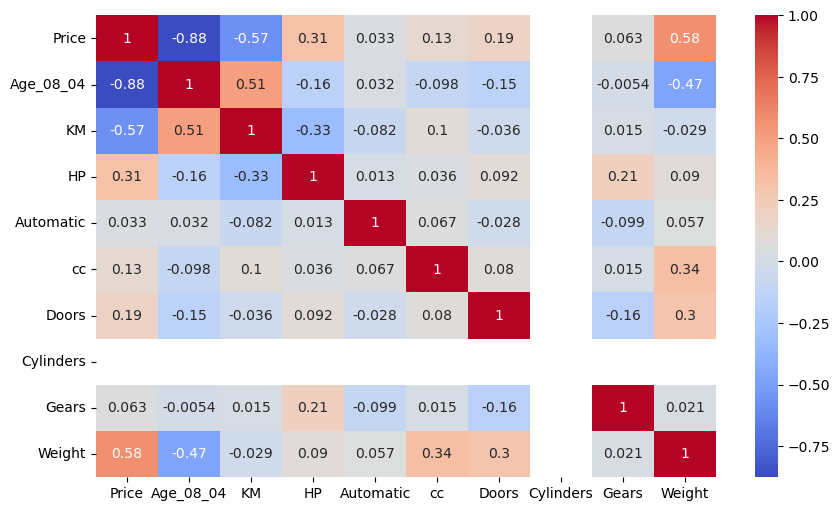

In [8]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [9]:
### detects multoclinearity

In [10]:
### data preprocessing

In [11]:
df = pd.get_dummies(df,columns=['Fuel_Type'],drop_first=True)

In [12]:
x=df.drop('Price',axis=1)
y= df['Price']

In [13]:
### train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 11)
(288, 11)
(1148,)
(288,)


In [14]:
### build MLR Model
mlr=LinearRegression()
mlr.fit(x_train,y_train)
y_pred = mlr.predict(x_test)

In [15]:
coeff_df = pd.DataFrame({'Feature':x.columns,'Coefficient':mlr.coef_})
coeff_df

,Feature,Coefficient
0,Age_08_04,-1.208305e+02
1,KM,-1.623141e-02
2,HP,1.403948e+01
3,Automatic,1.488309e+02
4,cc,-3.037219e-02
5,Doors,-6.031097e+01
6,Cylinders,-1.108447e-12
7,Gears,5.516007e+02
8,Weight,2.588496e+01
9,Fuel_Type_Diesel,-6.854876e+01


In [16]:
###Positive coefficient → increases price
###Negative coefficient → decreases price

In [17]:
### MODel 2
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

mlr_scaled = LinearRegression()
mlr_scaled.fit(x_train_scaled,y_train)

y_pred_scaled = mlr_scaled.predict(x_test_scaled)

In [18]:
### Standardization ensures fair contribution of all variables
### Required for Lasso & Ridge

In [20]:
### Model 3
x_reduced = df[['Age_08_04','KM','HP','Weight']]
y = df['Price']

x_train_r,x_test_r,y_train_r,y_test_r=train_test_split(x_reduced,y,test_size=0.2,random_state=42)

mlr_reduced = LinearRegression()
mlr_reduced.fit(x_train_r,y_train_r)

y_pred_reduced = mlr_reduced.predict(x_test_r)

In [21]:
### 5
### Model evaluation
def evaluate_model(y_true,y_pred):
    print('MAE:',mean_absolute_error(y_true,y_pred))
    print('MSE:',mean_squared_error(y_true,y_pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_true,y_pred)))
    print('R2_Score:',r2_score(y_true,y_pred))

In [22]:
evaluate_model(y_test,y_pred)

MAE: 990.8872739193923
MSE: 2203043.8231437025
RMSE: 1484.2654153296514
R2_Score: 0.8348888040611082


In [23]:
###MAE → average error
###MSE → penalizes large errors
###RMSE → error in original units (EUROs)
###R² → goodness of fit (closer to 1 is better)

In [24]:
### LAsso And Ridge regression
ridge = Ridge(alpha=1)
ridge.fit(x_train_scaled,y_train)

y_pred_ridge=ridge.predict(x_test_scaled)
evaluate_model(y_test,y_pred_ridge)

MAE: 990.8591771287421
MSE: 2200942.874523292
RMSE: 1483.557506308162
R2_Score: 0.8350462635431566


In [25]:
###Penalizes large coefficients
#Reduces multicollinearity
#Keeps all features

In [26]:
### Lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_scaled,y_train)

y_pred_lasso = lasso.predict(x_test_scaled)
evaluate_model(y_test,y_pred_lasso)


MAE: 990.8885709207191
MSE: 2203013.1930404636
RMSE: 1484.2550970235754
R2_Score: 0.8348910996908748


I performed EDA to understand relationships, encoded categorical variables, split data into train-test sets, built multiple linear regression models, evaluated them using RMSE and R², and applied Ridge and Lasso to handle multicollinearity and improve generalization.